##### Machine Learning Algorithm on Linear DataSet.

    Problem Statement:
        The goal of this project is to predict the Selling Price of used motorcycles based on various features such as 
        brand, model, year of manufacture, seller type, ownership details, kilometers driven, and the ex-showroom price. 
        By building a predictive model, we aim to help buyers and sellers understand the expected market price 
        of a used bike, given its characteristics. Additionally, this model could assist in determining a fair price 
        for used motorcycles in the secondary market, offering insights for both consumers and sellers.

    Domain of Work:
        The problem falls under the Used Vehicle Pricing Prediction domain, which is part of the Automotive and 
        E-commerce sectors. It involves predictive modeling and regression analysis techniques to estimate the 
        selling price of vehicles (motorcycles in this case) based on historical data and various attributes. 
        This type of model can be used by online marketplaces, dealerships, insurance companies, and consumers 
        to make data-driven decisions when buying or selling used motorcycles.
        
    The project would typically use machine learning algorithms 
        (like Linear Regression, Decision Trees, Random Forests, etc.) 
    to build a predictive model for the Selling_Price using the above features as predictors. 
    This model can then be evaluated using metrics like 𝑅2 score or Mean Absolute Error (MAE) to gauge its accuracy.

In [296]:
import numpy as np, pandas as pd
import seaborn as sns, plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
import datetime

import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [297]:
bike_df = pd.read_csv('Bike Prices.csv')
bike_df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [298]:
print("The Shape of the DataFrame is :", bike_df.shape)

The Shape of the DataFrame is : (1061, 8)


In [299]:
bike_df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [300]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [301]:
bike_df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [302]:
bike_df.isnull().sum()[bike_df.isnull().sum() > 0]

Ex_Showroom_Price    435
dtype: int64

    Seems that only Ex_Showroom has some half of Null values so don't need of that columns but we have some different 
    approaches also : 
        1. Seperate the all values to Train and Null values to Test.
        2. Remove that column.

In [303]:
bike_ex = bike_df.copy()

In [304]:
bike_ex.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [305]:
bike_ex_train = bike_ex[bike_ex['Ex_Showroom_Price'].notnull()]
bike_ex_train.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [306]:
bike_ex_test = bike_ex[bike_ex['Ex_Showroom_Price'].isnull()]
bike_ex_test.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
626,Royal,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
627,Honda,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
628,Yamaha,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
629,Royal,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
630,Hero,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN


In [307]:
print("\tShape of Created DataSet") 
print('_'*30)
print("DataSet\t\tRow\tColumn")
print('-'*30)
print(f"bike_df\t\t{bike_df.shape[0]}\t{bike_df.shape[1]}")
print(f"bike_ex_train\t{bike_ex_train.shape[0]}\t{bike_ex_train.shape[1]}")
print(f"bike_ex_test\t{bike_ex_test.shape[0]}\t{bike_ex_test.shape[1]}")
print('_'*30)

	Shape of Created DataSet
______________________________
DataSet		Row	Column
------------------------------
bike_df		1061	8
bike_ex_train	626	8
bike_ex_test	435	8
______________________________


In [308]:
bike_ex.duplicated().sum()

6

In [309]:
bike_ex.drop_duplicates(inplace = True)

In [310]:
bike_ex_train.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [311]:
bike_ex_train.isnull().sum()[bike_ex_train.isnull().sum() > 0]

Series([], dtype: int64)

In [312]:
bike_ex_test.drop('Ex_Showroom_Price', axis = 1, inplace = True)
bike_ex_test.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven'],
      dtype='object')

In [313]:
print(f"We have {bike_ex_train['Year'].nunique()} Unique values or Years :")
bike_ex_train['Year'].unique()

We have 18 Unique values or Years :


array([2017, 2011, 2010, 2012, 2015, 2014, 2009, 2016, 2006, 2013, 2018,
       2007, 2019, 2008, 2001, 2004, 2005, 2020], dtype=int64)

In [314]:
year_sales = bike_ex_train.pivot_table(
    values = ['Selling_Price', 'Ex_Showroom_Price'],
    index = 'Year',
    aggfunc = 'sum'
)

year_sales.head(10).transpose()

Year,2001,2004,2005,2006,2007,2008,2009,2010,2011,2012
Ex_Showroom_Price,54852.0,54852.0,54852.0,204658.0,404294.0,522227.0,852189.0,2176050.0,2768388.0,2594741.0
Selling_Price,20000.0,18000.0,10000.0,46000.0,149900.0,139100.0,317000.0,897600.0,1214000.0,1213988.0


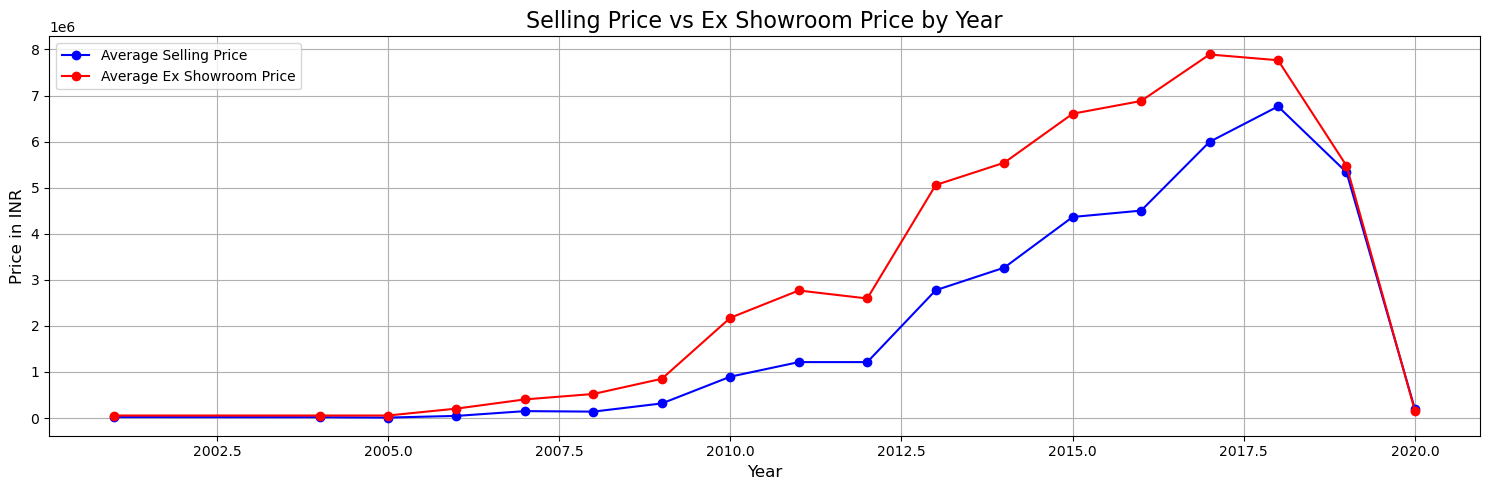

In [315]:
plt.figure(figsize = [15, 5])
plt.plot(
    year_sales.index, 
    year_sales['Selling_Price'],
    label = 'Average Selling Price', 
    marker = 'o', 
    color = 'b'
)
plt.plot(
    year_sales.index, 
    year_sales['Ex_Showroom_Price'],
    label = 'Average Ex Showroom Price', 
    marker = 'o', 
    color = 'r'
)
plt.title('Selling Price vs Ex Showroom Price by Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price in INR', fontsize = 12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [316]:
trace1 = go.Scatter(
    x = year_sales.index,
    y = year_sales['Selling_Price'],
    mode = 'lines+markers',
    name = 'Total Selling Price',
    line = dict(color='blue'),
    marker = dict(symbol = 'square', size = 6)
)
trace2 = go.Scatter(
    x = year_sales.index,
    y = year_sales['Ex_Showroom_Price'],
    mode = 'lines+markers',
    name = 'Total Ex Showroom Price',
    line = dict(color='red'),
    marker = dict(symbol='circle', size=6)
)
layout = go.Layout(
    title = 'Selling Price vs Ex Showroom Price by Year',
    xaxis = dict(title='Year'),
    yaxis = dict(title='Price in INR'),
    showlegend = True,
    template = 'plotly_dark'
)
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

In [317]:
year_sales = bike_ex_train.pivot_table(
    values = ['Selling_Price', 'Ex_Showroom_Price'],
    index = 'Year',
    aggfunc = ['sum', 'count']
)

year_sales.transpose()

Year                        2001     2004     2005      2006      2007  \
sum   Ex_Showroom_Price  54852.0  54852.0  54852.0  204658.0  404294.0   
      Selling_Price      20000.0  18000.0  10000.0   46000.0  149900.0   
count Ex_Showroom_Price      1.0      1.0      1.0       4.0       6.0   
      Selling_Price          1.0      1.0      1.0       4.0       6.0   

Year                         2008      2009       2010       2011       2012  \
sum   Ex_Showroom_Price  522227.0  852189.0  2176050.0  2768388.0  2594741.0   
      Selling_Price      139100.0  317000.0   897600.0  1214000.0  1213988.0   
count Ex_Showroom_Price       7.0      14.0       28.0       33.0       37.0   
      Selling_Price           7.0      14.0       28.0       33.0       37.0   

Year                          2013       2014       2015       2016  \
sum   Ex_Showroom_Price  5058105.0  5541270.0  6605062.0  6881753.0   
      Selling_Price      2774500.0  3263900.0  4364000.0  4502185.0   
count Ex_Showroom_Price       53.0       66.0       80.0       84.0   
      Selling_Price           53.0       66.0       80.0       84.0   

Year                          2017       2018       2019      2020  
sum   Ex_Showroom_Price  7891017.0  7766286.0  5475819.0  155740.0  
      Selling_Price      5995000.0  6763500.0  5334000.0  190000.0  
count Ex_Showroom_Price       85.0       77.0       48.0       1.0  
      Selling_Price           85.0       77.0       48.0       1.0

    We'll it seems that we have no of bikes sales in the mid of 2016 to 2018 and we have sudden drop on 2020 
    that can be the in the case of less bike data registered.
    we'll this may not be useful but can keep it.

In [318]:
current_year = datetime.datetime.now().year
bike_ex_train['Bike_Age'] = current_year - bike_ex_train['Year']
bike_ex_train['Bike_Age'].describe()

count    626.000000
mean       9.199681
std        3.018885
min        4.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       23.000000
Name: Bike_Age, dtype: float64

In [319]:
oldest_bike = bike_ex_train.groupby('Brand')['Bike_Age'].max()
oldest_bike = oldest_bike.sort_values(ascending = False)

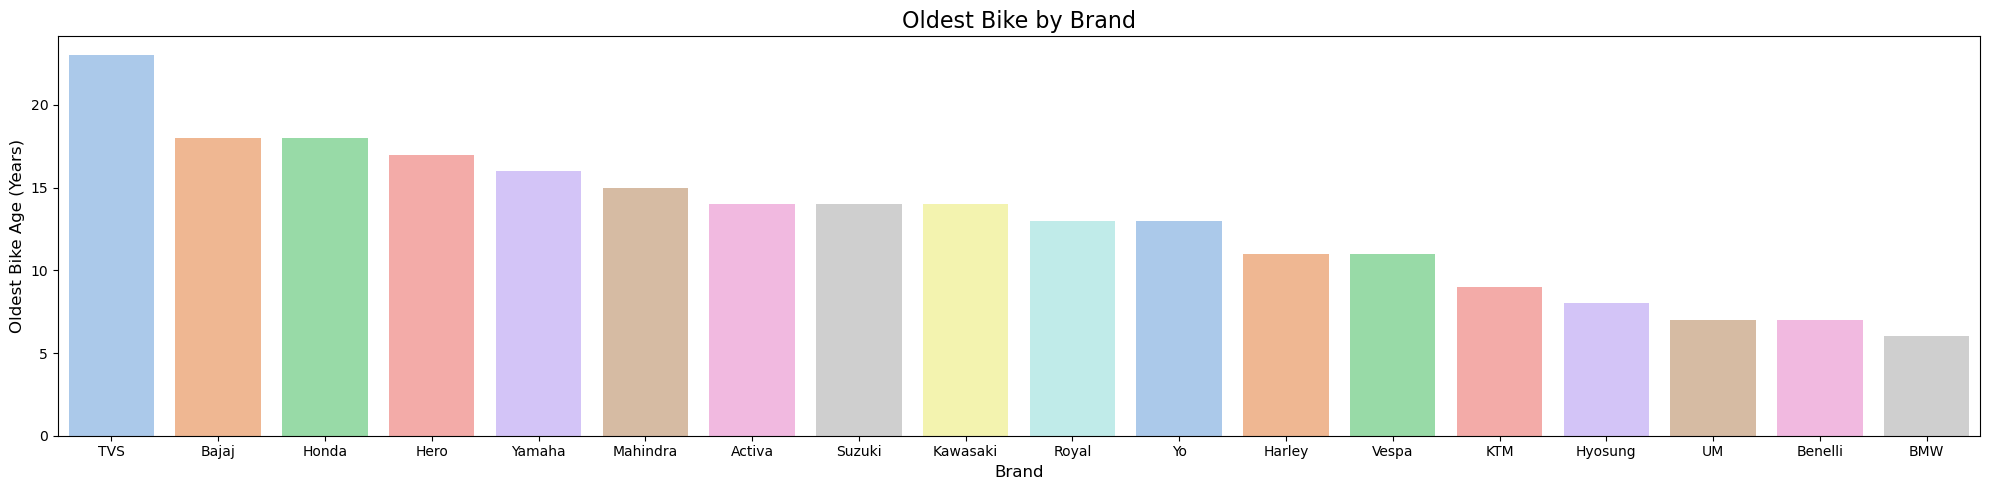

In [320]:
plt.figure(figsize = [20, 5])
sns.barplot(
    x = oldest_bike.index, 
    y = oldest_bike.values, 
    palette = 'pastel'
)

plt.title('Oldest Bike by Brand', fontsize = 16)
plt.xlabel('Brand', fontsize = 12)
plt.ylabel('Oldest Bike Age (Years)', fontsize = 12)

plt.tight_layout()
plt.show()

In [321]:
bike_ex_train.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price', 'Bike_Age'],
      dtype='object')

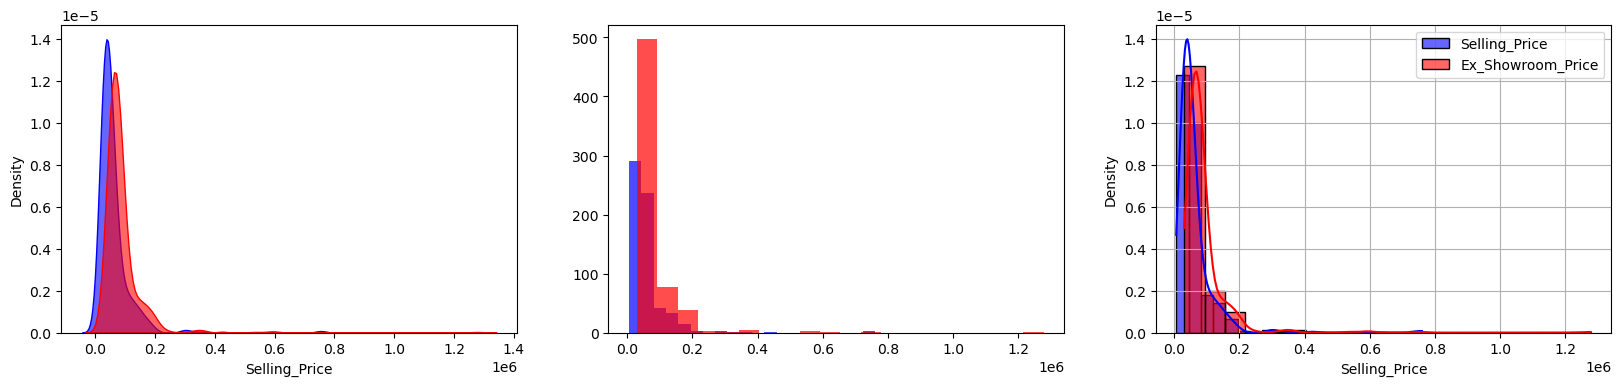

In [322]:
plt.figure(figsize = [20, 4])
plt.subplot(1, 3, 1)
sns.kdeplot(bike_ex_train['Selling_Price'], label = 'Selling_Price', fill = True, color = 'blue', alpha = 0.6)
sns.kdeplot(bike_ex_train['Ex_Showroom_Price'], label = 'Ex_Showroom_Price', fill = True, color = 'red', alpha = 0.6)

plt.subplot(1, 3, 2)
plt.hist(bike_ex_train['Selling_Price'], bins=20, label='Selling_Price', alpha=0.7, color='blue')
plt.hist(bike_ex_train['Ex_Showroom_Price'], bins=20, label='Ex_Showroom_Price', alpha=0.7, color='red')

plt.subplot(1, 3, 3)
sns.histplot(bike_ex_train['Selling_Price'], kde=True, label='Selling_Price', color='blue', stat='density', bins=20, alpha=0.6)
sns.histplot(bike_ex_train['Ex_Showroom_Price'], kde=True, label='Ex_Showroom_Price', color='red', stat='density', bins=20, alpha=0.6)
plt.legend()
plt.grid(True)
plt.show()

In [323]:
bike_ex_train['Actual'] = bike_ex_train['Ex_Showroom_Price'] - bike_ex_train['Selling_Price']
bike_ex_train['Actual'].head()

0      490.0
1    14000.0
2    17675.0
3    17859.0
4    17860.0
Name: Actual, dtype: float64

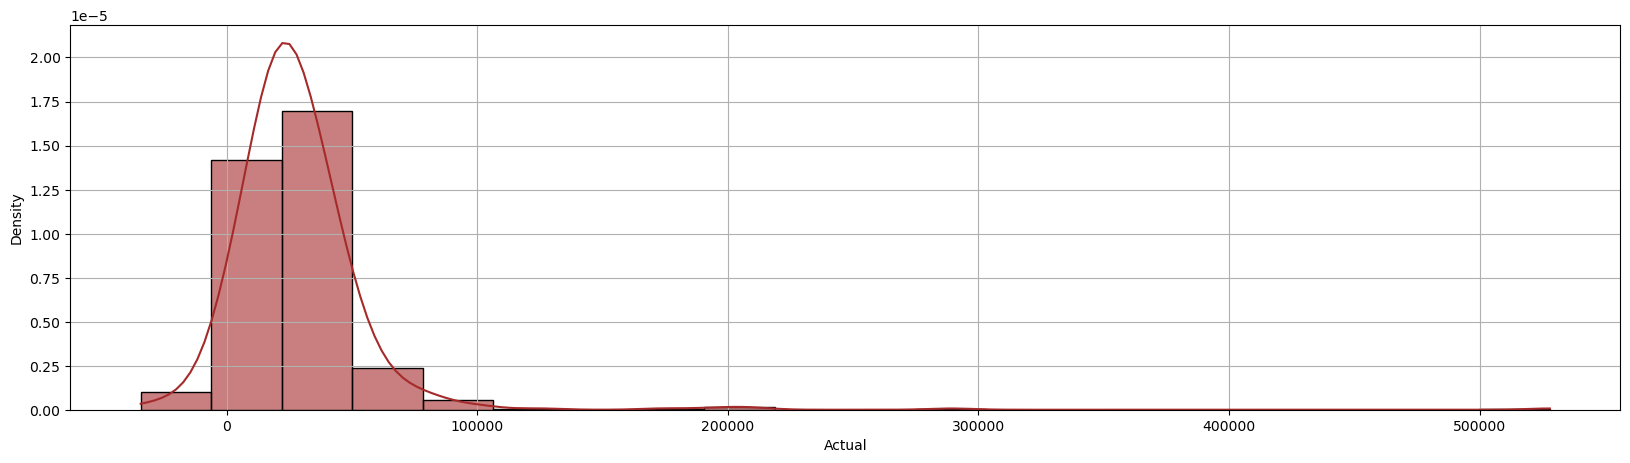

In [324]:
plt.figure(figsize = [20, 5])
sns.histplot(bike_ex_train['Actual'], kde=True, color='brown', stat='density', bins=20, alpha=0.6)

plt.grid(True)
plt.show()

In [325]:
fig = px.histogram(bike_ex_train, x="Actual", nbins=20, color_discrete_sequence=["#636EFA"], marginal="rug", opacity=0.7)

kde = gaussian_kde(bike_ex_train['Actual'])
x_vals = np.linspace(min(bike_ex_train['Actual']), max(bike_ex_train['Actual']), 1000)
y_vals = kde(x_vals)

fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='KDE', line=dict(color='orange', width=3)))

fig.update_layout(
    title = "Distribution of Actual (Ex Showroom Price - Selling Price) with KDE Line",
    xaxis_title = "Difference (Ex Showroom Price - Selling Price)",
    yaxis_title = "Density",
    template = "plotly_dark",
    bargap = 0.1,
    showlegend = True
)
fig.show()

In [326]:
bike_brand = bike_ex_train['Brand'].value_counts(normalize = True) * 100
bike_brand[bike_brand > 1]

Brand
Honda     27.156550
Bajaj     22.843450
Hero      17.252396
Yamaha    15.015974
Royal      6.389776
TVS        3.674121
Suzuki     2.875399
Name: proportion, dtype: float64

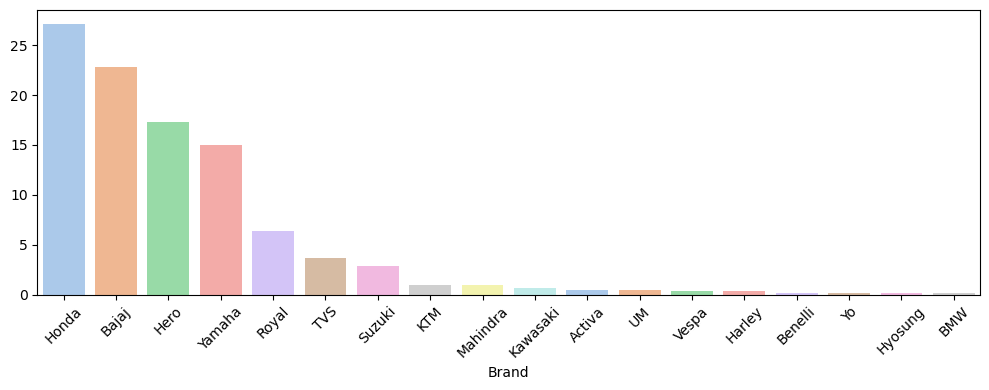

In [327]:
plt.figure(figsize = [10, 4])
sns.barplot(x = bike_brand.index, y = bike_brand.values, palette = 'pastel')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [328]:
bike_ex_train.replace({'Seller_Type':{'Individual':0, 'Dealer':1}}, inplace=True)
bike_ex_train['Seller_Type'].unique()

array([0, 1], dtype=int64)

In [329]:
bike_ex_train.replace({'Owner':{'1st owner':0, '2nd owner':1, '3rd owner':2, '4th owner':3}}, inplace=True)
bike_ex_train['Owner'].unique()

array([0, 1, 2, 3], dtype=int64)

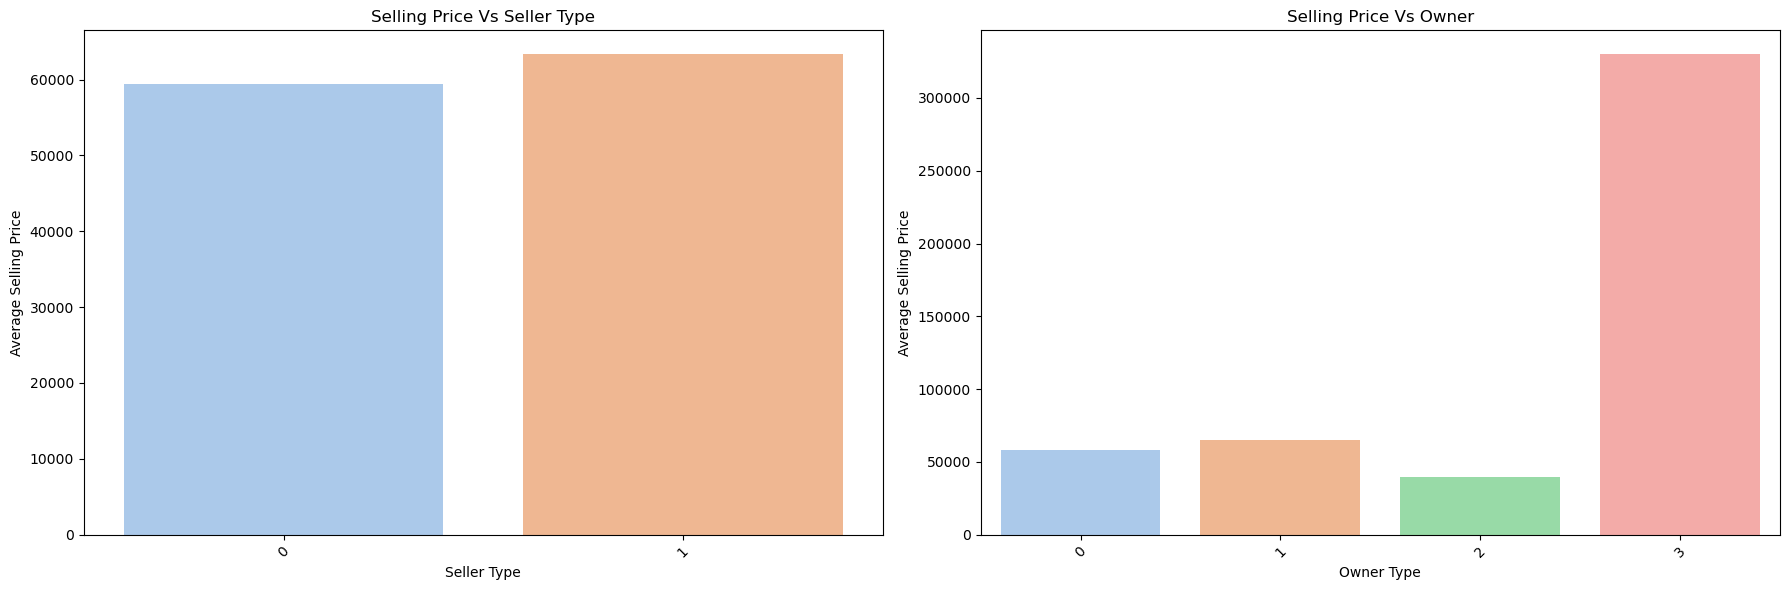

In [330]:
plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
sns.barplot(x = bike_ex_train['Seller_Type'], y = bike_ex_train['Selling_Price'], palette = 'pastel', ci = None)
plt.title('Selling Price Vs Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x = bike_ex_train['Owner'], y = bike_ex_train['Selling_Price'], palette = 'pastel', ci = None)
plt.title('Selling Price Vs Owner')
plt.xlabel('Owner Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [331]:
fig = px.scatter(bike_ex_train, x='KM_Driven', y='Selling_Price', color='Owner',
                 title='Interactive Scatter Plot of KM Driven vs Selling Price by Owner Type',
                 labels={'KM_Driven': 'Kilometers Driven (KM)', 'Selling_Price': 'Selling Price (INR)', 'Owner': 'Owner Type'})

fig.show()

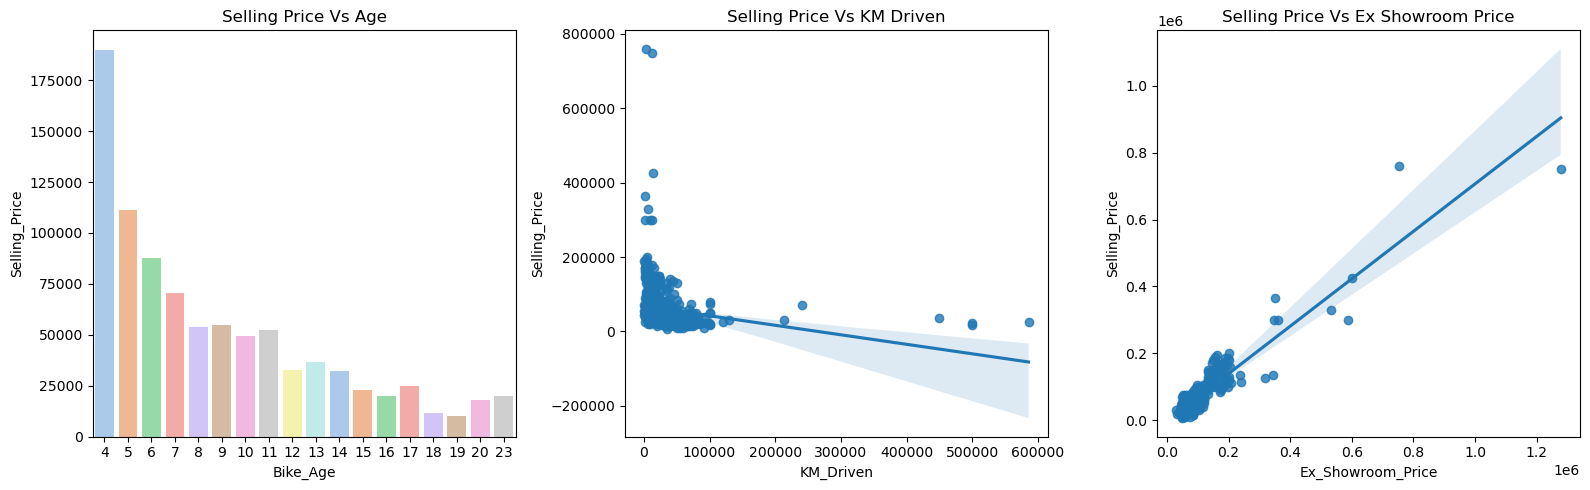

In [332]:
plt.figure(figsize = [16, 5])
plt.subplot(1, 3, 1)
sns.barplot(x = 'Bike_Age', y = 'Selling_Price', data = bike_ex_train, palette = 'pastel', errorbar = None)
plt.title('Selling Price Vs Age')

plt.subplot(1 ,3 , 2)
sns.regplot(x = 'KM_Driven', y = 'Selling_Price', data = bike_ex_train)
plt.title('Selling Price Vs KM Driven') 

plt.subplot(1 ,3 , 3)
sns.regplot(x = 'Ex_Showroom_Price', y = 'Selling_Price', data = bike_ex_train)
plt.title('Selling Price Vs Ex Showroom Price') 

plt.tight_layout()
plt.show()

In [333]:
numeric_cols = bike_ex_train.select_dtypes(include = [float, int]).columns

In [334]:
numeric_cols

Index(['Selling_Price', 'Year', 'Seller_Type', 'Owner', 'KM_Driven',
       'Ex_Showroom_Price', 'Bike_Age', 'Actual'],
      dtype='object')

In [335]:
Q1 = bike_ex_train[numeric_cols].quantile(0.25)
Q3 = bike_ex_train[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

Selling_Price        35000.00
Year                     4.00
Seller_Type              0.00
Owner                    0.00
KM_Driven            26968.75
Ex_Showroom_Price    32179.50
Bike_Age                 4.00
Actual               22631.50
dtype: float64

In [336]:
def outlier_remover(col) :
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    col[col < lower_limit] = lower_limit
    col[col > upper_limit] = upper_limit
    return col

In [337]:
outlier_remover(bike_ex_train['Selling_Price'])
outlier_remover(bike_ex_train['KM_Driven'])
outlier_remover(bike_ex_train['Bike_Age'])
outlier_remover(bike_ex_train['Ex_Showroom_Price'])

print("Outliers Settled")

Outliers Settled


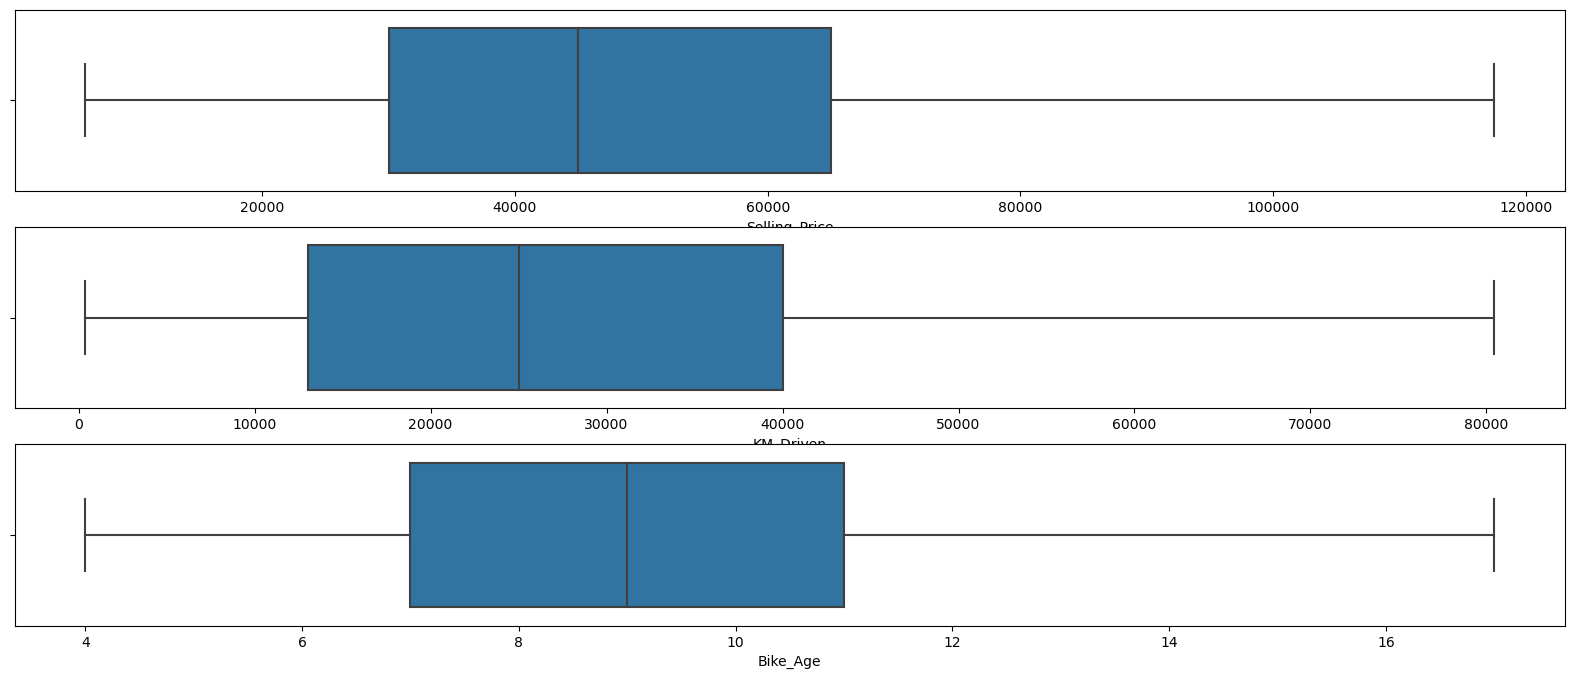

In [338]:
plt.figure(figsize = [20, 8])
plt.subplot(3, 1, 1)
sns.boxplot(x = bike_ex_train['Selling_Price'])
plt.subplot(3, 1, 2)
sns.boxplot(x = bike_ex_train['KM_Driven'])
plt.subplot(3, 1, 3)
sns.boxplot(x = bike_ex_train['Bike_Age'])
plt.show()

In [339]:
fig = px.scatter(bike_ex_train, x='KM_Driven', y='Selling_Price', color='Owner',
                 title='Interactive Scatter Plot of KM Driven vs Selling Price by Owner Type',
                 labels={'KM_Driven': 'Kilometers Driven (KM)', 'Selling_Price': 'Selling Price (INR)', 'Owner': 'Owner Type'})

fig.show()

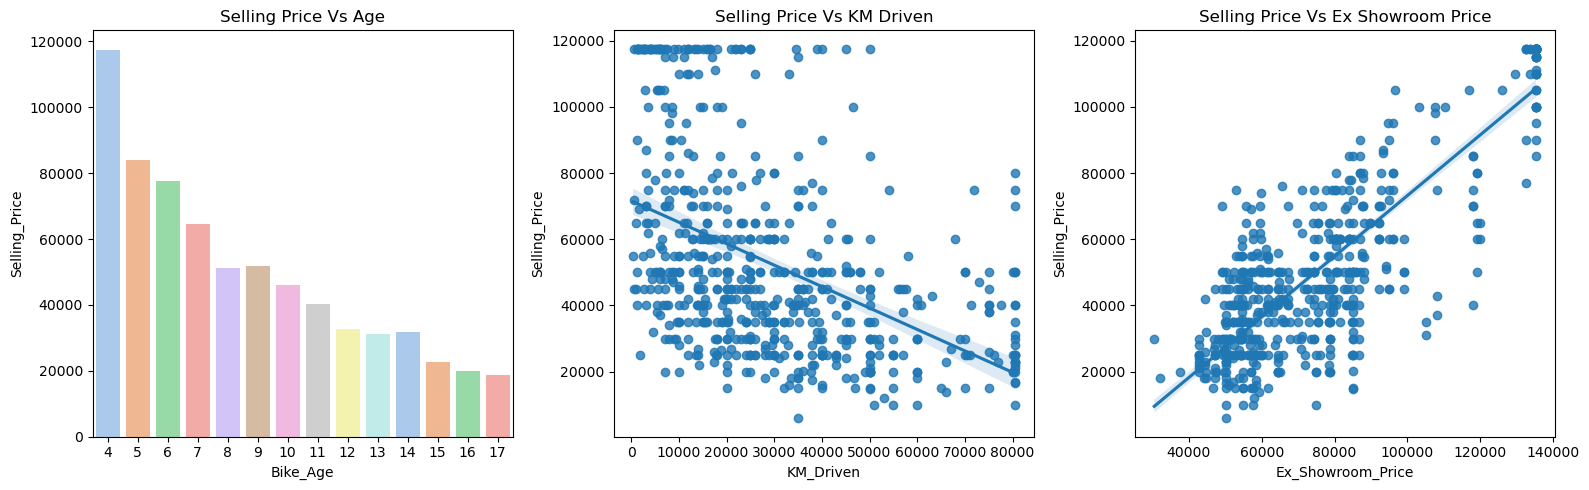

In [340]:
plt.figure(figsize = [16, 5])
plt.subplot(1, 3, 1)
sns.barplot(x = 'Bike_Age', y = 'Selling_Price', data = bike_ex_train, palette = 'pastel', errorbar = None)
plt.title('Selling Price Vs Age')

plt.subplot(1 ,3 , 2)
sns.regplot(x = 'KM_Driven', y = 'Selling_Price', data = bike_ex_train)
plt.title('Selling Price Vs KM Driven') 

plt.subplot(1 ,3 , 3)
sns.regplot(x = 'Ex_Showroom_Price', y = 'Selling_Price', data = bike_ex_train)
plt.title('Selling Price Vs Ex Showroom Price') 

plt.tight_layout()
plt.show()

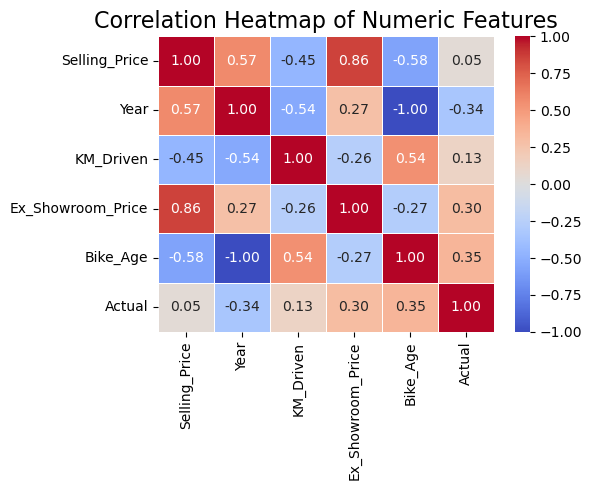

In [341]:
numeric_columns = ['Selling_Price', 'Year', 'KM_Driven', 'Ex_Showroom_Price', 'Bike_Age', 'Actual']
corr_matrix = bike_ex_train[numeric_columns].corr()
plt.figure(figsize = [6, 5])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

In [342]:
bike_ex_train.drop(['Brand', 'Model', "Actual", "Year"], inplace = True, axis = 1)
bike_ex_train.head()

,Selling_Price,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price,Bike_Age
0,30000,0,0,8000.0,30490.0,7
1,18000,0,0,35000.0,32000.0,7
2,20000,0,0,10000.0,37675.0,13
3,25000,0,0,43000.0,42859.0,14
4,24999,0,1,35000.0,42859.0,12


In [343]:
bike_ex_train.columns

Index(['Selling_Price', 'Seller_Type', 'Owner', 'KM_Driven',
       'Ex_Showroom_Price', 'Bike_Age'],
      dtype='object')

In [344]:
Y_train = bike_ex_train['Ex_Showroom_Price']
X_train = bike_ex_train.drop(['Ex_Showroom_Price'], axis = 1)

In [345]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [346]:
model.intercept_

-2628.4647672751744

In [347]:
model.coef_

array([9.86663830e-01, 3.07286039e+03, 1.29603268e+03, 7.08147469e-02,
       2.83611023e+03])

In [348]:
Y_pred = model.predict(X_train)

In [349]:
MAE = mean_absolute_error(Y_train, Y_pred)
MSE = mean_squared_error(Y_train, Y_pred)
R2 = r2_score(Y_train, Y_pred)

print('Test Mean Squared Error for test data: ', MSE)
print('Test Mean Absolute Error for test data: ', MAE)
print('Test R2 Score for test data: ', R2)

Test Mean Squared Error for test data:  148019594.7338803
Test Mean Absolute Error for test data:  9464.152663958228
Test R2 Score for test data:  0.8070500837780067


In [350]:
dt_rgs = DecisionTreeRegressor()

hyp_grid = {
    'criterion' : ['absolute_error', 'poisson', 'squared_error', 'friedman_mse'],
    'max_depth' : np.arange(3, 15),
    'min_samples_split' : np.arange(2, 20),
    'min_samples_leaf' : np.arange(1, 20)
}

model_2 = RandomizedSearchCV(dt_rgs, hyp_grid, cv = 5)

In [351]:
model_2.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['absolute_error',
                                                      'poisson',
                                                      'squared_error',
                                                      'friedman_mse'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [352]:
model_2.best_estimator_

DecisionTreeRegressor(max_depth=14, min_samples_leaf=15, min_samples_split=13)

In [353]:
dt_reg = DecisionTreeRegressor(max_depth=6, min_samples_leaf=7, min_samples_split=10)
dt_reg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=7, min_samples_split=10)

In [354]:
y_pred = dt_reg.predict(X_train)

In [355]:
print("Value of MAE : ", mean_absolute_error(Y_train, y_pred))
print("Value of MSE : ", mean_squared_error(Y_train, y_pred))
print("R2 Error: ", r2_score(Y_train, y_pred))

Value of MAE :  8430.403100809564
Value of MSE :  130066661.24636637
R2 Error:  0.8304525057247947


In [356]:
bike_ex_test

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven
626,Royal,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350
627,Honda,Honda Dio,45000,2017,Individual,1st owner,5650
628,Yamaha,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000
629,Royal,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000
630,Hero,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000
...,...,...,...,...,...,...,...
1056,Royal,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000
1057,Hero,Hero Honda Hunk,20000,2010,Individual,1st owner,17000
1058,Bajaj,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000
1059,Hero,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000


In [357]:
bike_ex_final = bike_ex_test.copy()

In [358]:
bike_ex_final.replace({'Seller_Type':{'Individual':0, 'Dealer':1}}, inplace=True)
bike_ex_final['Seller_Type'].unique()

array([0, 1], dtype=int64)

In [359]:
bike_ex_final.replace({'Owner':{'1st owner':0, '2nd owner':1, '3rd owner':2, '4th owner':3}}, inplace=True)
bike_ex_final['Owner'].unique()

array([0, 1, 2, 3], dtype=int64)

In [360]:
current_year = datetime.datetime.now().year
bike_ex_final['Bike_Age'] = current_year - bike_ex_final['Year']
bike_ex_final['Bike_Age'].describe()

count    435.000000
mean      11.475862
std        5.384843
min        4.000000
25%        7.000000
50%       11.000000
75%       15.000000
max       36.000000
Name: Bike_Age, dtype: float64

In [361]:
bike_ex_final.drop(['Brand', 'Model', 'Year'], axis = 1, inplace = True)
bike_ex_final.head()

,Selling_Price,Seller_Type,Owner,KM_Driven,Bike_Age
626,175000,0,0,350,5
627,45000,0,0,5650,7
628,20000,0,1,21000,13
629,180000,0,1,39000,16
630,30000,0,0,32000,14


In [362]:
test_predict = dt_reg.predict(bike_ex_final)

In [363]:
bike_ex_test.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven
626,Royal,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350
627,Honda,Honda Dio,45000,2017,Individual,1st owner,5650
628,Yamaha,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000
629,Royal,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000
630,Hero,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000


In [364]:
bike_ex_test['EX_Showroom_Price_Predict'] = test_predict

In [365]:
bike_ex_test['EX_Showroom_Price_Predict'] = bike_ex_test['EX_Showroom_Price_Predict'].round()

In [366]:
bike_ex_test.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,EX_Showroom_Price_Predict
626,Royal,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,135138.0
627,Honda,Honda Dio,45000,2017,Individual,1st owner,5650,72106.0
628,Yamaha,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,48873.0
629,Royal,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,135301.0
630,Hero,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,75968.0


In [371]:
bike_df['Ex_Showroom_Price'].fillna(bike_ex_test['EX_Showroom_Price_Predict'], inplace = True)

#### Working on Seller type and fetching the values by the Extracted Record.

In [375]:
bike_df

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0
...,...,...,...,...,...,...,...,...
1056,Royal,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,111462.0
1057,Hero,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,52723.0
1058,Bajaj,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,86224.0
1059,Hero,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,84511.0


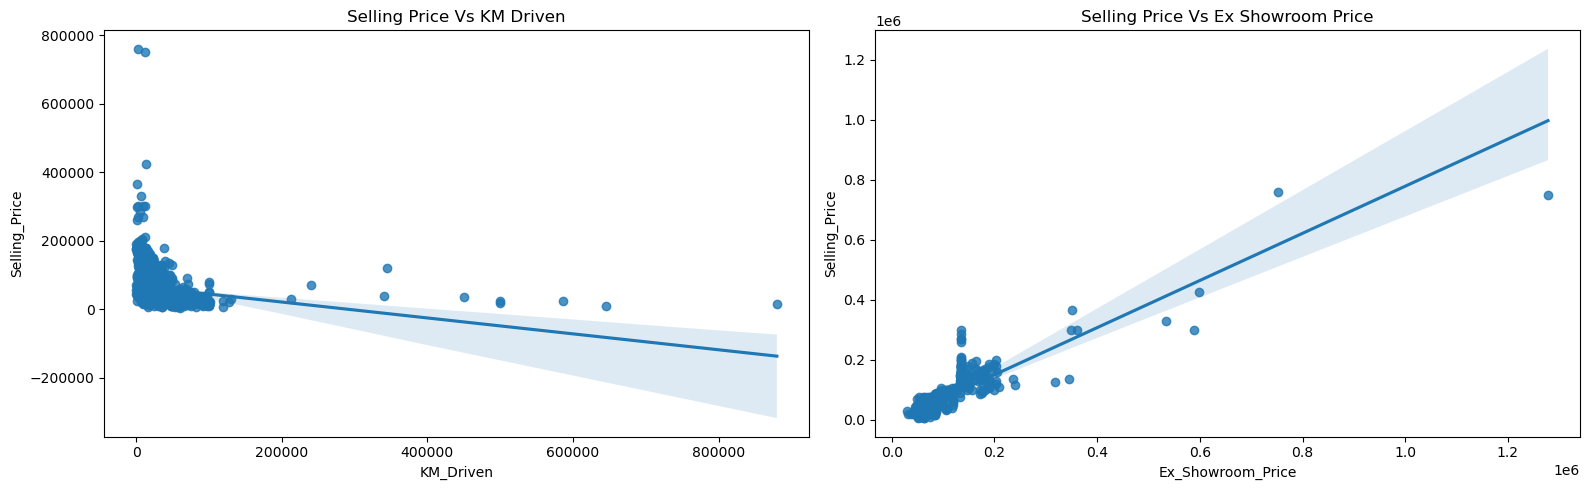

In [377]:
plt.figure(figsize = [16, 5])
plt.subplot(1 ,2 , 1)
sns.regplot(x = 'KM_Driven', y = 'Selling_Price', data = bike_df)
plt.title('Selling Price Vs KM Driven') 

plt.subplot(1 ,2 , 2)
sns.regplot(x = 'Ex_Showroom_Price', y = 'Selling_Price', data = bike_df)
plt.title('Selling Price Vs Ex Showroom Price') 

plt.tight_layout()
plt.show()

In [379]:
bike_df.shape

(1061, 8)

In [380]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  1061 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [381]:
bike_df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,1.061000e+03
mean,59638.151744,2013.867107,34359.833176,8.561450e+04
std,56304.291973,4.301191,51623.152702,6.230098e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.692500e+04
50%,45000.000000,2015.000000,25000.000000,7.210600e+04
75%,70000.000000,2017.000000,43000.000000,9.094800e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [382]:
bike_df.dtypes

Brand                 object
Model                 object
Selling_Price          int64
Year                   int64
Seller_Type           object
Owner                 object
KM_Driven              int64
Ex_Showroom_Price    float64
dtype: object

In [383]:
bike_df.isnull().sum()

Brand                0
Model                0
Selling_Price        0
Year                 0
Seller_Type          0
Owner                0
KM_Driven            0
Ex_Showroom_Price    0
dtype: int64

In [384]:
bike_df['Age'] = 2024 - bike_df['Year']
bike_df.drop('Year', axis=1, inplace=True)

In [389]:
bike_df = bike_df.drop(['Brand','Model'], axis=1)

In [391]:
bike_df.replace({'Seller_Type':{'Individual':0, 'Dealer':1}},inplace=True)
bike_df['Seller_Type'].unique()

array([0, 1], dtype=int64)

In [397]:
bike_df.replace({'Owner':{'1st owner':0, '2nd owner':1, '3rd owner':2,  '4th owner':3}},inplace=True)
bike_df['Owner'].unique()

array([0, 1, 2, 3], dtype=int64)

In [394]:
bike_df.head()

,Selling_Price,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price,Age
0,30000,0,0,8000,30490.0,7
1,18000,0,0,35000,32000.0,7
2,20000,0,0,10000,37675.0,13
3,25000,0,0,43000,42859.0,14
4,24999,0,1,35000,42859.0,12


In [398]:
corr_matrix = bike_df.corr()
corr_matrix

,Selling_Price,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price,Age
Selling_Price,1.000000,-0.017382,-0.001927,-0.212937,0.869186,-0.402188
Seller_Type,-0.017382,1.000000,0.035284,0.001314,-0.009890,0.050293
Owner,-0.001927,0.035284,1.000000,0.139740,0.082243,0.224308
KM_Driven,-0.212937,0.001314,0.139740,1.000000,-0.121452,0.288675
Ex_Showroom_Price,0.869186,-0.009890,0.082243,-0.121452,1.000000,-0.181575
Age,-0.402188,0.050293,0.224308,0.288675,-0.181575,1.000000


In [399]:
bike_df.columns

Index(['Selling_Price', 'Seller_Type', 'Owner', 'KM_Driven',
       'Ex_Showroom_Price', 'Age'],
      dtype='object')

In [401]:
Y = bike_df['Selling_Price']
X = bike_df.drop(['Selling_Price'], axis=1)

In [402]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2529)

In [403]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((742, 5), (319, 5), (742,), (319,))

In [404]:
model = LinearRegression()

In [405]:
model.fit(X_train, Y_train)

LinearRegression()

In [406]:
model.intercept_

20781.98998853373

In [407]:
model.coef_

array([ 9.09111588e+03, -2.02434625e+03, -2.99182487e-02,  8.13875496e-01,
       -2.93396630e+03])

In [408]:
Y_pred = model.predict(X_test)

In [409]:
Y_pred.shape

(319,)

In [410]:
MSE = mean_squared_error(Y_test, Y_pred)
MAE = mean_absolute_error(Y_test, Y_pred)
R2 = r2_score(Y_test, Y_pred)

print('Test Mean Squared Error for test data: ', MSE)
print('Test Mean Absolute Error for test data: ', MAE)
print('Test R2 Score for test data: ', R2)

Test Mean Squared Error for test data:  765023816.5517788
Test Mean Absolute Error for test data:  14195.46355806388
Test R2 Score for test data:  0.7860011205594992


In [411]:
dt_rgs = DecisionTreeRegressor()

hyp_grid = {
    'criterion' : ['absolute_error', 'poisson', 'squared_error', 'friedman_mse'],
    'max_depth' : np.arange(3, 15),
    'min_samples_split' : np.arange(2, 20),
    'min_samples_leaf' : np.arange(1, 20)
}

model_2 = RandomizedSearchCV(dt_rgs, hyp_grid, cv = 5)

In [412]:
model_2.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['absolute_error',
                                                      'poisson',
                                                      'squared_error',
                                                      'friedman_mse'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [413]:
model_2.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=11, min_samples_split=16)

In [414]:
dt_reg = DecisionTreeRegressor(criterion='poisson', max_depth=11, min_samples_split=16)
dt_reg.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=11, min_samples_split=16)

In [415]:
y_pred = dt_reg.predict(X_train)

In [416]:
print("Value of MAE : ", mean_absolute_error(Y_train, y_pred))
print("Value of MSE : ", mean_squared_error(Y_train, y_pred))
print("R2 Error: ", r2_score(Y_train, y_pred))

Value of MAE :  7610.284412630672
Value of MSE :  325944602.6401929
R2 Error:  0.8909792605527582


#### Thanku for Scrolling This